In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [65]:
def calc_beta(x, y):
    return np.sum((x - np.mean(x))*(y - np.mean(y, axis=1, keepdims=True)), axis=1)/sum((x - np.mean(x))**2)

In [93]:
# Purpose of this notebook is to examine effects of non-normality of residuals on statistical inference of regression parameters
np.random.seed(123)
n = 1000
n_samples = 10000
beta = 0.05
alpha = 0

### Normally distributed residual, varying standard deviation

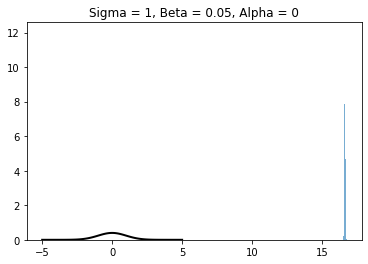

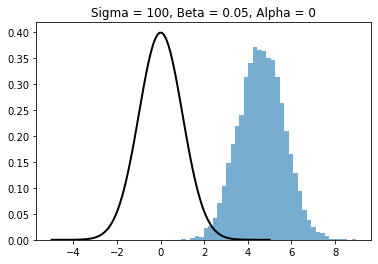

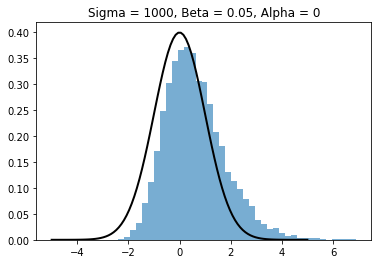

In [94]:
# Residuals normally distributed N(0, sigma**2)
mu = 0
for sigma in [1, 100, 1000]:
    x = np.arange(n)
    y = beta*x + alpha + np.random.normal(loc=mu, scale=sigma, size=(n_samples, n)) # N(0,1) residuals
    beta_est = calc_beta(x, y)
    y_pred = y*beta_est.reshape((len(beta_est)), 1) + alpha
    residuals = y - y_pred
    S = np.sqrt(1/(n-2)*np.sum(residuals**2, axis=1, keepdims=True))
    SXX = np.sum((x - np.mean(x))**2)
    test_statistic = (beta_est.reshape(len(beta_est), 1) - 0)/(S/np.sqrt(SXX))
    fig, ax = plt.subplots(1, 1)
    plt.hist(test_statistic, bins=40, density=True, alpha=0.6)

    # Plot the PDF.
    xmin = -5
    xmax = 5
    t_range = np.linspace(xmin, xmax, 100)
    p = st.t.pdf(t_range, n-2)  
    plt.plot(t_range, p, 'k', linewidth=2)
    plt.title(f'Sigma = {sigma}, Beta = {beta}, Alpha = {alpha}')
    plt.show()

#### Note to above - as the variance increases, we are more likely to incorrectly accept the null hypothesis, which is an intuitive result.

### Exponentially distributed residuals, varying n

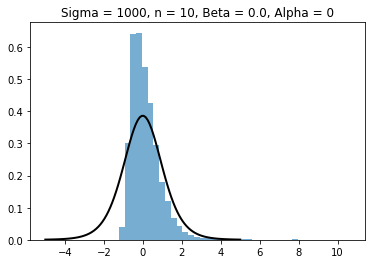

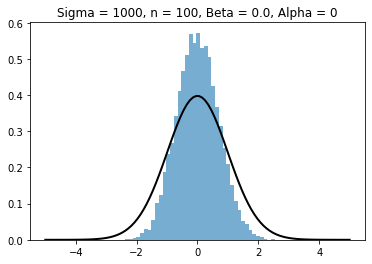

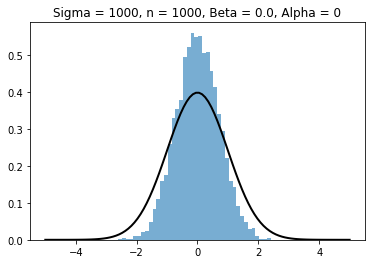

In [89]:
# Residuals exponentially distributed N(0, sigma**2)
exp_scale = 2
for n in [10, 100, 1000]:
    x = np.arange(n)
    y = beta*x + alpha + np.random.exponential(scale=exp_scale, size=(n_samples, n)) # Exp(1) residuals
    beta_est = calc_beta(x, y)
    y_pred = y*beta_est.reshape((len(beta_est)), 1) + alpha
    residuals = y - y_pred
    S = np.sqrt(1/(n-2)*np.sum(residuals**2, axis=1, keepdims=True))
    SXX = np.sum((x - np.mean(x))**2)
    test_statistic = (beta_est.reshape(len(beta_est), 1) - 0)/(S/np.sqrt(SXX))
    fig, ax = plt.subplots(1, 1)
    plt.hist(test_statistic, bins=40, density=True, alpha=0.6)

    # Plot the PDF.
    xmin = -5
    xmax = 5
    t_range = np.linspace(xmin, xmax, 100)
    p = st.t.pdf(t_range, n-2)  
    plt.plot(t_range, p, 'k', linewidth=2)
    plt.title(f'Sigma = {sigma}, n = {n}, Beta = {beta}, Alpha = {alpha}')
    plt.show()

#### Note on the above - the exponential residual errors at larger sample sizes results in the test statistic being relatively t-distributed, although is more narrow.

### Chi-square distributed residuals, varying n

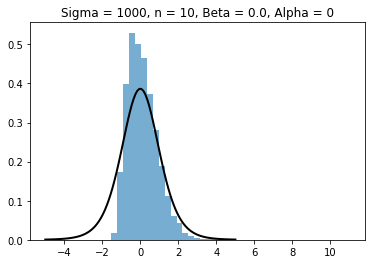

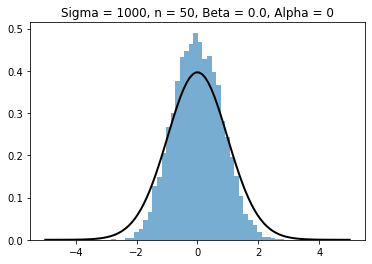

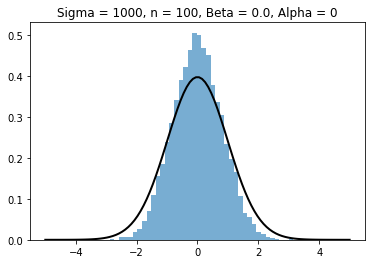

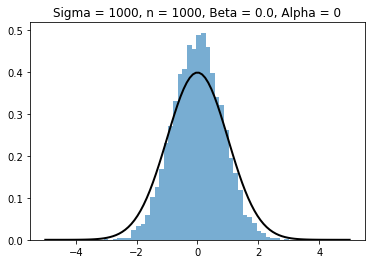

In [91]:
# Residuals chi-squared distributed
for n in [10, 50, 100, 1000]:
    x = np.arange(n)
    y = beta*x + alpha + np.random.chisquare(df=1, size=(n_samples, n)) # Exp(1) residuals
    beta_est = calc_beta(x, y)
    y_pred = y*beta_est.reshape((len(beta_est)), 1) + alpha
    residuals = y - y_pred
    S = np.sqrt(1/(n-2)*np.sum(residuals**2, axis=1, keepdims=True))
    SXX = np.sum((x - np.mean(x))**2)
    test_statistic = (beta_est.reshape(len(beta_est), 1) - 0)/(S/np.sqrt(SXX))
    fig, ax = plt.subplots(1, 1)
    plt.hist(test_statistic, bins=40, density=True, alpha=0.6)

    # Plot the PDF.
    xmin = -5
    xmax = 5
    t_range = np.linspace(xmin, xmax, 100)
    p = st.t.pdf(t_range, n-2)  
    plt.plot(t_range, p, 'k', linewidth=2)
    plt.title(f'Sigma = {sigma}, n = {n}, Beta = {beta}, Alpha = {alpha}')
    plt.show()


#### Note on above - Very similar observation to that of exponential

### Gamma distributed residuals - varying n

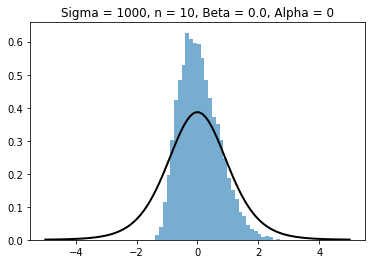

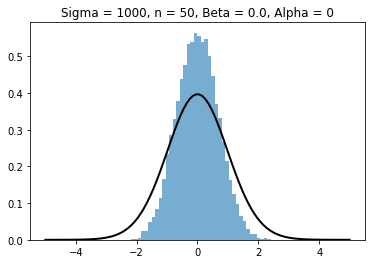

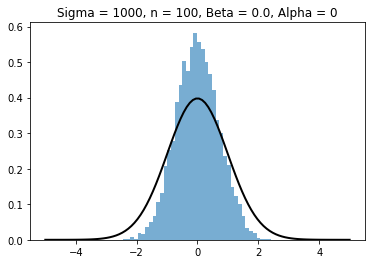

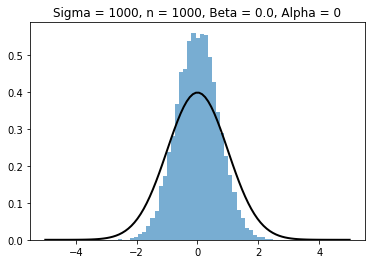

In [92]:
# Residuals chi-squared distributed
for n in [10, 50, 100, 1000]:
    x = np.arange(n)
    y = beta*x + alpha + np.random.gamma(shape=1, scale=1, size=(n_samples, n)) # Exp(1) residuals
    beta_est = calc_beta(x, y)
    y_pred = y*beta_est.reshape((len(beta_est)), 1) + alpha
    residuals = y - y_pred
    S = np.sqrt(1/(n-2)*np.sum(residuals**2, axis=1, keepdims=True))
    SXX = np.sum((x - np.mean(x))**2)
    test_statistic = (beta_est.reshape(len(beta_est), 1) - 0)/(S/np.sqrt(SXX))
    fig, ax = plt.subplots(1, 1)
    plt.hist(test_statistic, bins=40, density=True, alpha=0.6)

    # Plot the PDF.
    xmin = -5
    xmax = 5
    t_range = np.linspace(xmin, xmax, 100)
    p = st.t.pdf(t_range, n-2)  
    plt.plot(t_range, p, 'k', linewidth=2)
    plt.title(f'Sigma = {sigma}, n = {n}, Beta = {beta}, Alpha = {alpha}')
    plt.show()